# LDA

Данный код показывает, как рабоатет латентное размещение Дирихле LDA.

Применение ЛДА к набору данных 2 классов, сгенерированных из многомерного нормального распредления и построение проекционного вектора для разделения классов.

1. Генерация наборов данных для 2 классов (np.random.multivariate_normal), построение их в 2D пространстве
2. Расчет среднего значения и ковариационных матриц
3. Нахождение проекционныого вектора W
4. Оценка расстояния Махаланобиса (степени перекрытия классов в проекции на W)
5. Получение проекции исходных данных на вектор W (снижение размерности)
6. Построение 1D проекции сходного вектора в виде гистограммы распредления значений 2-х классов
7. Построение проекционныого вектора и разделяющего классы вектора (перпендикулярного проекционному) на проскости с исходными данными
8. Опредление принадлежности новой точки к 1-у или 2-у классу (линейный классификатор)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### 1) Сгенерируем наборы данных для 2 классов (np.random.multivariate_normal), построим их в 2D пространстве

In [2]:
class_1 = 1000
class_2 = 1000
x1 = np.random.multivariate_normal([2, 0], [[2, .25],[.25, 1]], class_1)
x2 = np.random.multivariate_normal([1, 4], [[2, .25],[.25, 1]], class_2)

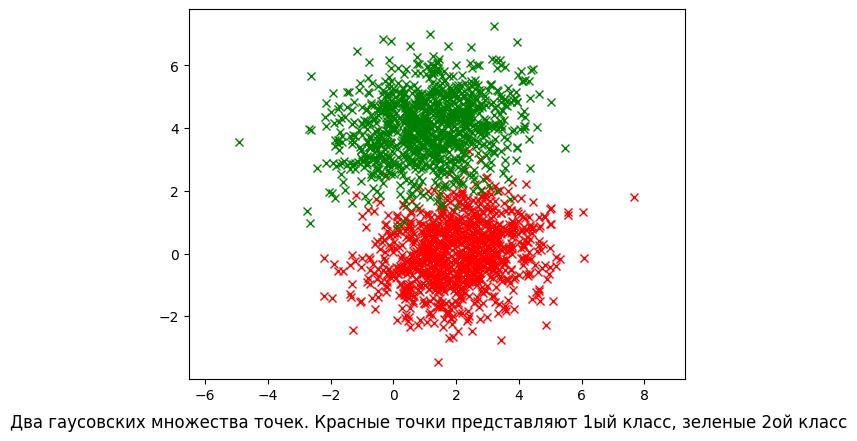

In [3]:
plt.plot(x1[:,0], x1[:,1],'x', color='red')
plt.plot(x2[:,0], x2[:,1],'x', color='green')
# plt.plot(W[0], W[1],'o', color='blue')
# plt.plot(J[0], J[1],'o', color='blue')
# plt.plot(0, 0, 'o', color='purple')
plt.figtext(0.5, 0.01, 'Два гаусовских множества точек. Красные точки представляют 1ый класс, зеленые 2ой класс', 
            wrap=True, horizontalalignment='center', fontsize=12)
plt.axis('equal')
plt.show()

### 2) Рассчитаем средние значения и ковариационные матрицы

In [4]:
mu_1 = np.mean(x1, axis=0)
mu_2 = np.mean(x2, axis=0)
mu_1, mu_2

(array([ 1.99352742e+00, -4.25092137e-05]), array([1.11233234, 4.04569236]))

In [5]:
def covar(x, y):
    """Рассчет ковариации двух величин"""
    Mx = np.mean(x)
    My = np.mean(y)
    return np.dot((x - Mx),(y - My).T)/len(x)

In [6]:
def covar_matrix(arr):
    """Рассчет матрицы ковариации столбцов массива"""
    N = arr.shape[1]
    cov_matrix = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            cov_matrix[i][j] = covar(arr[:, i], arr[:, j])
    return cov_matrix

Получается такая матрица:

    | cov(x,x) cov(x,y)|
    |                  |
    | cov(y,x) cov(y,y)|

In [7]:
cov1 = covar_matrix(x1)
print(f'Для x1:\nСамодельная матрица:\n{cov1}\nNumpy матрица:\n{np.cov(x1.T)}')

Для x1:
Самодельная матрица:
[[1.93126605 0.26387831]
 [0.26387831 1.01990318]]
Numpy матрица:
[[1.93319925 0.26414246]
 [0.26414246 1.0209241 ]]


In [8]:
cov2 = covar_matrix(x2)
print(f'Для x2:\nСамодельная матрица:\n{cov2}\nNumpy матрица:\n{np.cov(x2.T)}')

Для x2:
Самодельная матрица:
[[2.09328413 0.2901684 ]
 [0.2901684  1.04447117]]
Numpy матрица:
[[2.09537951 0.29045886]
 [0.29045886 1.04551668]]


### 3) Найдем проекционный вектор W

In [9]:
cov_mean = np.linalg.inv((cov1 + cov2))
cov_mean

array([[ 0.25800776, -0.06924536],
       [-0.06924536,  0.50299267]])

In [10]:
W = np.dot(cov_mean, (mu_1 - mu_2))
W = W

In [11]:
y1 = np.dot(W, x1.T)
y2 = np.dot(W, x2.T)
y1.shape

(1000,)

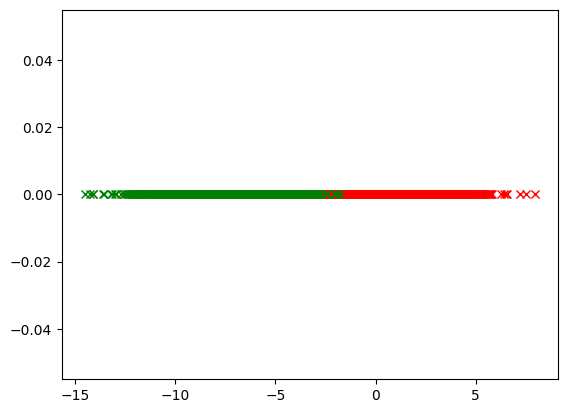

In [12]:
plt.plot(y1, np.zeros_like(y1),'x', color='red')
plt.plot(y2, np.zeros_like(y2),'x', color='green')
plt.show()

### 4) Оценим расстояние Махаланобиса (степени перекрытия классов в проекции на W)
### 5) Получим проекцию исходных данных на вектор W (снижение размерности)

In [13]:
My1 = sum(y1)/len(y1)
My2 = sum(y2)/len(y2)
My1, My2

(1.0118113310500638, -7.915232925847771)

In [14]:
sigma = sum((np.abs(y1 - y2) - np.abs(My1 - My2))**2) / len(y1)
sigma

8.80249783222776

In [15]:
cov_y1 = np.dot((y1 - My1),(y1 - My1).T)/len(y1)
cov_y2 = np.dot((y2 - My2),(y2 - My2).T)/len(y2)
cov_y1, cov_y2

(4.41665692868669, 4.510387328211136)

In [16]:
# def mahalanobis_custom(x1, x2, cov):
#     x = x1 - x2
#     inv_covmat = np.linalg.inv(cov)
#     left = np.dot(x, inv_covmat)
#     mahal = np.dot(left, x.T)
#     return math.sqrt(mahal)
# a1 = np.array([17., 20.])
# a2 = np.array([0., -14.])
# mahalanobis_custom(a1, a2, np.cov(y1, y2, rowvar=False))

In [17]:
D = np.sqrt(sum(((y1 - y2)**2)/sigma))
D

100.2664095660799

In [18]:
D =  np.sqrt(np.dot(W.T, mu_1-mu_2))
D

2.9878159677091607

In [19]:
W

array([ 0.50750354, -2.09599366])

### 6) Построим 1D проекцию исходного вектора в виде гистограммы распредления значений 2-х классов (убедимся что классы разделяются)

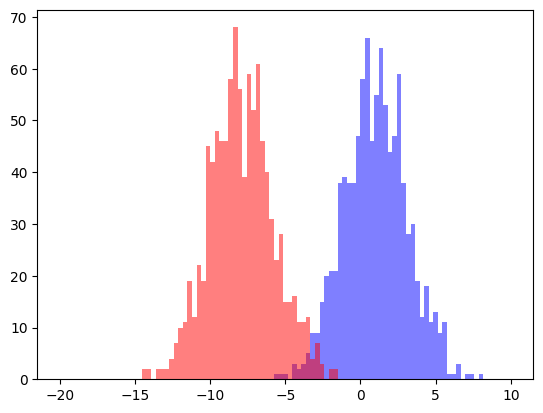

In [20]:
plt.figure()
bins = np.linspace(-20, 10, 100)
plt.hist(y1, bins, alpha=0.5, color = 'blue')
plt.hist(y2, bins,alpha=0.5, color = 'red')
plt.show()

Классы разделяются хорошо

### 7) Построим проекционный вектор и разделяющий классы вектор (перпендикулярный проекционному) на проскости с исходными данными

In [26]:
W

array([ 0.50750354, -2.09599366])

In [27]:
W_plot = np.linspace(-0.1, 3)
LDA_plot = np.linspace(-2, 7)
k = W[1]/W[0]
k

-4.130007925561319

In [28]:
np.vstack((x1,x2))[:,0]

array([-0.18507427,  2.99636607, -0.46590312, ...,  0.77448553,
        1.47405212,  1.05482394])

In [29]:
meanx = np.mean(np.vstack((x1,x2))[:,0])
meany = np.mean(np.vstack((x1,x2))[:,1])
meanx, meany

(1.5529298799589344, 2.0228249234618962)

In [30]:
a = meany - k * meanx
b = meany - (-1/k)*meanx
LDAy = (-1/k)*LDA_plot + b
a, b

(8.436437635533284, 1.6468135675641054)

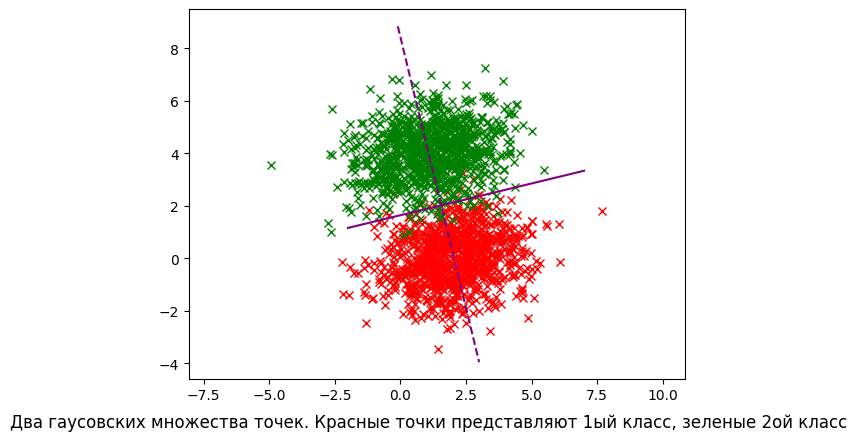

In [31]:
plt.plot(x1[:,0], x1[:,1],'x', color='red')
plt.plot(x2[:,0], x2[:,1],'x', color='green')
plt.plot(W_plot, k*W_plot +a, linestyle='dashed', color='purple')
plt.plot(LDA_plot, LDAy, linestyle='solid', color='purple')
plt.figtext(0.5, 0.01, 'Два гаусовских множества точек. Красные точки представляют 1ый класс, зеленые 2ой класс', 
            wrap=True, horizontalalignment='center', fontsize=12)
plt.axis('equal')
plt.show()

### 8) Определим принадлежность новой точки к 1-у или 2-у классу (линейный классификатор)

In [32]:
y1 = np.ones(len(x1))
y2 = 2* np.ones(len(x2))

X_train =  np.vstack((x1,x2))
Y_train = np.vstack((y1,y2))

In [33]:
arr = np.hstack((X_train,Y_train.reshape(-1,1)))
mu_1 = np.mean(arr[arr[:,-1] == 1],axis=0)[:-1]
mu_2 = np.mean(arr[arr[:,-1] == 2],axis=0)[:-1]
mu = [mu_1,mu_2]

In [34]:
def delta(k,x):
    return (np.dot(np.dot((x), cov_mean),mu[k]) - (1/2)*np.dot(np.dot(mu[k].T,cov_mean),mu[k]))

In [35]:
def prediction(x):
    L = []
    for k in range(2):
        L.append(delta(k, x))
    return np.argmax(L)

In [36]:
prediction(x1[10]), prediction(x2[50])

(0, 1)

In [37]:
prediction([0, 0]), prediction([0, 2])

(0, 1)

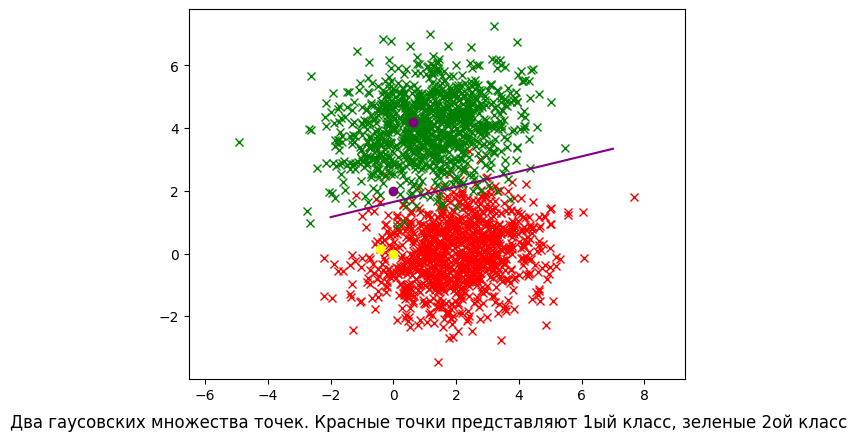

In [39]:
plt.plot(x1[:,0], x1[:,1],'x', color='red')
plt.plot(x2[:,0], x2[:,1],'x', color='green')
plt.plot(LDA_plot, LDAy, linestyle='solid', color='purple')
plt.plot(x1[10,0], x1[10,1], 'o', color='yellow')
plt.plot(x2[50,0], x2[50,1], 'o', color='purple')
plt.plot(0, 0,'o', color='yellow')
plt.plot(0, 2, 'o', color='purple')
# plt.plot(J[0], J[1],'o', color='blue')
# plt.plot(0, 0, 'o', color='purple')
plt.figtext(0.5, 0.01, 'Два гаусовских множества точек. Красные точки представляют 1ый класс, зеленые 2ой класс', 
            wrap=True, horizontalalignment='center', fontsize=12)
plt.axis('equal')
plt.show()

Видим, что классы хорошо разделяются